Indices 

In [1]:
import pandas as pd

df = pd.read_excel("Indices weed-crop.xlsx", sheet_name="Uberset")


In [2]:
df = pd.read_excel("Indices weed-crop.xlsx", sheet_name="Spring")

In [5]:
df=df.drop(["date","plant","leaf","code"],axis=1)

In [7]:
df.head()       # Shows the first five rows
df.info()       # Gives an overview of columns, data types, and non-null counts
df.describe()   # Provides summary statistics for numeric columns


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 744 entries, 0 to 743
Data columns (total 34 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   species  744 non-null    object 
 1   RARSa    744 non-null    float64
 2   RARSb    744 non-null    float64
 3   NDVI705  744 non-null    float64
 4   PSSRa    744 non-null    float64
 5   PSSRb    744 non-null    float64
 6   PSNDa    744 non-null    float64
 7   PSNDb    744 non-null    float64
 8   YI       744 non-null    float64
 9   mSR      744 non-null    float64
 10  mNDI     744 non-null    float64
 11  DD       744 non-null    float64
 12  RES      744 non-null    float64
 13  RARSc    744 non-null    float64
 14  SIPI     744 non-null    float64
 15  PSSRc    744 non-null    float64
 16  PRI      744 non-null    float64
 17  CARI     744 non-null    float64
 18  MSI      744 non-null    float64
 19  WI       744 non-null    float64
 20  TM5/TM7  744 non-null    float64
 21  NDVIa    744 non

,RARSa,RARSb,NDVI705,PSSRa,PSSRb,PSNDa,PSNDb,YI,mSR,mNDI,...,TBRIa,TBRIb,NDWIa,NDWIb,NDWIc,WABIa,WABIb,WABIc,NDlma,NDMI
count,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,...,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000,744.000000
mean,0.543062,0.045745,0.438281,6.931892,6.150310,0.719916,0.690046,-0.007455,1.342833,0.658349,...,0.991005,0.960842,0.500659,0.202353,0.485429,0.027149,0.033990,-0.033717,0.092257,-0.002378
std,0.130408,0.015277,0.092965,2.753838,2.433866,0.087538,0.095933,0.003932,0.437081,0.139365,...,0.017946,0.012479,0.084444,0.043564,0.083942,0.134802,0.132005,0.132051,0.024317,0.004698
min,0.252713,0.014465,0.167501,2.379702,2.342322,0.408232,0.401614,-0.020068,0.349013,0.239756,...,0.923857,0.893970,0.289802,0.106581,0.231953,-0.524922,-0.509767,-0.552210,0.002883,-0.018870
25%,0.430300,0.033694,0.368625,5.118320,4.457897,0.673113,0.633558,-0.009909,1.051391,0.548968,...,0.979161,0.955256,0.442854,0.173453,0.426817,-0.066132,-0.058484,-0.122785,0.075796,-0.004943
50%,0.566611,0.045221,0.449190,6.140668,5.538846,0.719914,0.694136,-0.007460,1.340732,0.667101,...,0.989009,0.962392,0.500089,0.199818,0.487031,0.055875,0.061752,-0.009552,0.091712,-0.002297
75%,0.652437,0.055434,0.516768,7.936846,7.143334,0.776207,0.754400,-0.005626,1.614491,0.772945,...,1.001140,0.968806,0.554103,0.223587,0.537048,0.117454,0.125091,0.057817,0.104925,0.000342
max,0.818370,0.104163,0.638737,15.674217,15.186808,0.880054,0.876443,0.011261,2.625792,1.079920,...,1.064606,0.995806,0.722249,0.427457,0.727450,0.420096,0.414519,0.357468,0.207107,0.011645


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier



In [11]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df.drop("species", axis=1)  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 0.8791946308724832


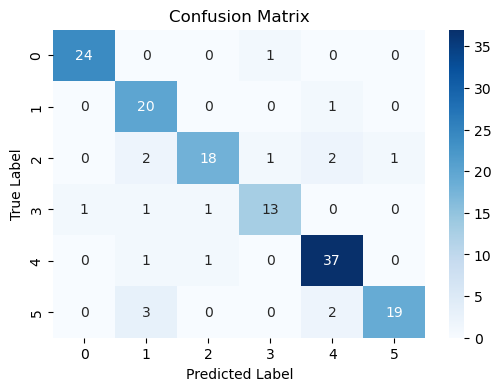

In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [156]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df

,CHEAL,CYPES,ECHCG,GASCI,Maize,SORHA
CHEAL,96.00,0.000000,0.000000,4.000000,0.000000,0.000000
CYPES,0.00,95.238095,0.000000,0.000000,4.761905,0.000000
ECHCG,0.00,8.333333,75.000000,4.166667,8.333333,4.166667
GASCI,6.25,6.250000,6.250000,81.250000,0.000000,0.000000
Maize,0.00,2.564103,2.564103,0.000000,94.871795,0.000000
SORHA,0.00,12.500000,0.000000,0.000000,8.333333,79.166667


In [158]:
# Assuming 'df' is your DataFrame and 'target' is the name of your target column:
X = df[["PSSRa","PSSRb","mSR","RARSc","PSSRc","CARI"]]  # Features
y = df["species"]               # Target

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the random forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Evaluate the model
accuracy = rf.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 0.7181208053691275


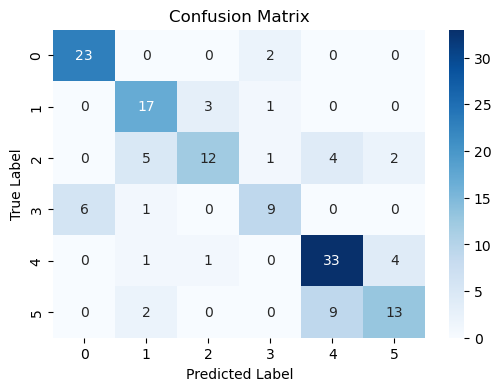

In [160]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [162]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix

y_pred = rf.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100

class_labels = np.unique(y_test)  # Adjust if needed
cm_df = pd.DataFrame(cm_percentage, index=class_labels, columns=class_labels)
cm_df


,CHEAL,CYPES,ECHCG,GASCI,Maize,SORHA
CHEAL,92.0,0.000000,0.000000,8.000000,0.000000,0.000000
CYPES,0.0,80.952381,14.285714,4.761905,0.000000,0.000000
ECHCG,0.0,20.833333,50.000000,4.166667,16.666667,8.333333
GASCI,37.5,6.250000,0.000000,56.250000,0.000000,0.000000
Maize,0.0,2.564103,2.564103,0.000000,84.615385,10.256410
SORHA,0.0,8.333333,0.000000,0.000000,37.500000,54.166667


In [15]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

# Example: 
# Assume your DataFrame `df` has feature columns and a 'species' column.
# Also assume you have lists or rules to define each hierarchy level:
monocot_species = ["species_CYPES", "species_ECHCG", "species_Maize","species_SORHA"]  # example species
dicot_species   = ["species_CHEAL", "species_GASCI"]
weed_species    = ["species_CYPES", "species_ECHCG", "species_CHEAL", "species_GASCI","species_SORHA"]  # example of some species labeled as weeds
crop_species    = ["species_Maize"]

# Create top-level categories:
df['category1'] = df['species'].apply(lambda s: 'monocot' if s in monocot_species else 'dicot')
df['category2'] = df['species'].apply(lambda s: 'weed' if s in weed_species else 'crop')

# Features and initial target for the first level:
X = df[["PSSRa", "PSSRb", "mSR", "RARSc", "PSSRc", "CARI"]]  # example features
y_cat1 = df["category1"]

# Split and train the first classifier (monocot vs dicot):
X_train_cat1, X_test_cat1, y_train_cat1, y_test_cat1 = train_test_split(X, y_cat1, test_size=0.2, random_state=42)
clf_cat1 = RandomForestClassifier(random_state=42)
clf_cat1.fit(X_train_cat1, y_train_cat1)

# Predict category1 on test set:
y_pred_cat1 = clf_cat1.predict(X_test_cat1)

# Now separate the test set predictions for monocots and dicots:
X_test_monocot = X_test_cat1[y_pred_cat1 == 'monocot']
X_test_dicot   = X_test_cat1[y_pred_cat1 == 'dicot']

# For the second level (weed vs crop), train two separate models—one for monocot subset, one for dicot subset:
# Monocot subset:
monocot_mask = df['category1'] == 'monocot'
X_monocot = X[monocot_mask]
y_monocot = df['category2'][monocot_mask]

X_train_mono, X_val_mono, y_train_mono, y_val_mono = train_test_split(X_monocot, y_monocot, test_size=0.2, random_state=42)
clf_cat2_monocot = RandomForestClassifier(random_state=42)
clf_cat2_monocot.fit(X_train_mono, y_train_mono)

# Dicot subset:
dicot_mask = df['category1'] == 'dicot'
X_dicot = X[dicot_mask]
y_dicot = df['category2'][dicot_mask]

X_train_di, X_val_di, y_train_di, y_val_di = train_test_split(X_dicot, y_dicot, test_size=0.2, random_state=42)
clf_cat2_dicot = RandomForestClassifier(random_state=42)
clf_cat2_dicot.fit(X_train_di, y_train_di)

# Predict weed/crop for each subgroup:
y_pred_cat2_monocot = clf_cat2_monocot.predict(X_test_monocot)
y_pred_cat2_dicot   = clf_cat2_dicot.predict(X_test_dicot)


ValueError: With n_samples=0, test_size=0.2 and train_size=None, the resulting train set will be empty. Adjust any of the aforementioned parameters.